Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We observe that in this data set numerical as well as categorical data is presen

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning the data

In [4]:
#checking the null value of  column of dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see Age and Cabin have a lot of missing value.So First we need to deal with all these NaN values

In [5]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 866


<Axes: >

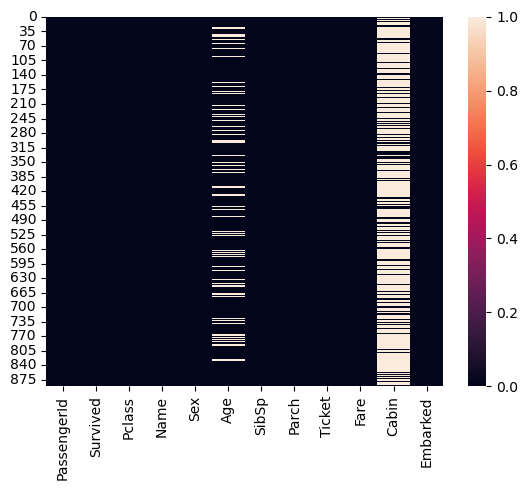

In [6]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#checking the shape of dataset
df.shape

(891, 12)

In [9]:
#checking the column of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# to convert index from row to columnWorld Happiness Report Project
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
#checking the types of column of dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

we observe that there are three types of data(int64,object,float)is present There are four type of variables
Numerical Features: Age, Fare, SibSp and Parch
Categorical Features: Sex, Embarked, Survived and Pclass
Alphanumeric Features: Ticket and Cabin(Contains both alphabets and the numeric value)
Text Features: Name

In [12]:
#checking the unique values of column of dataset
df.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [14]:
#As test has only one missing value so lets fill it..
df.Fare.fillna(df.Fare.mean(), inplace=True)
data_df = df.append(df) 
passenger_id=df['PassengerId']



## We will drop PassengerID and Ticket since it will be useless for our data. 


df.drop(['PassengerId'], axis=1, inplace=True)





In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.shape

(891, 11)

In [17]:
#checking the null value of  column of dataset
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#working with Missing value

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<Axes: xlabel='Survived', ylabel='Fare'>

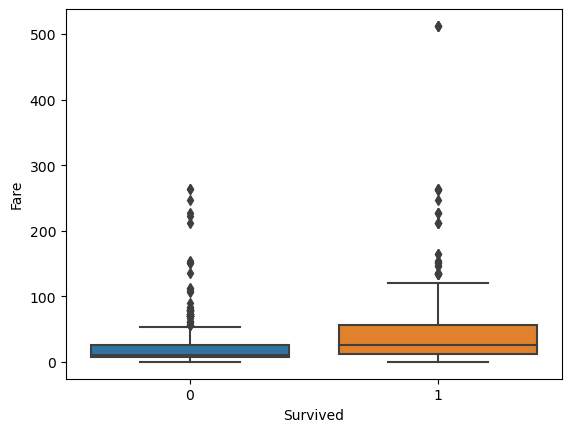

In [18]:
print (df.isnull().sum())
print (''.center(20, "*"))
print (df.isnull().sum())
sns.boxplot(x='Survived',y='Fare',data=df)

#working with Transforming Sex

In [19]:
df=df[df['Fare']<400]

In [20]:
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)


In [21]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [22]:
pd.options.display.max_columns = 99
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Split title from the "name" column
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

# Display the updated dataset
print(df.head())

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked Title  
0  22.0      1      0         A/5 21171   7.2500   NaN        S    Mr  
1  38.0      1      0          PC 17599  71.2833   C85        C   Mrs  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3  35.0      1      0            113803  53.1000  C123        S   Mrs  
4  35.0      0      0            373450   8.0500   NaN        S    Mr  


In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr


In [25]:
df.groupby('Title')['Age'].median()

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              29.5
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [26]:
df.Age.fillna(df.Age.median(), inplace=True)

In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
Title         0
dtype: int64

# Exploratory data analysis

In [28]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.341408,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,13.037026,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [29]:
df.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.028233,0.553734,0.329690,22.117887
1,1.958702,0.315634,28.229115,0.477876,0.466077,44.289799


In [30]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.741214,2.162939,27.907348,0.696486,0.651757,42.985091
1,0.186087,2.394783,30.122035,0.431304,0.234783,23.830658


There are a couple of points that should be noted from the statistical overview. They are..

About the survival rate, only 38% passenger survived during that tragedy.
About the survival rate for genders, 74% female passengers survived, while only 19% male passengers survived.

# Correlation Matrix and Heatmap

In [31]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.545899,-0.067081,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,0.132881,-0.338998,0.080937,0.018212,-0.604960
Sex,-0.545899,0.132881,1.000000,0.081203,-0.114799,-0.247003,-0.222361
Age,-0.067081,-0.338998,0.081203,1.000000,-0.232732,-0.172623,0.098801
SibSp,-0.033395,0.080937,-0.114799,-0.232732,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.247003,-0.172623,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,-0.222361,0.098801,0.211816,0.263910,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

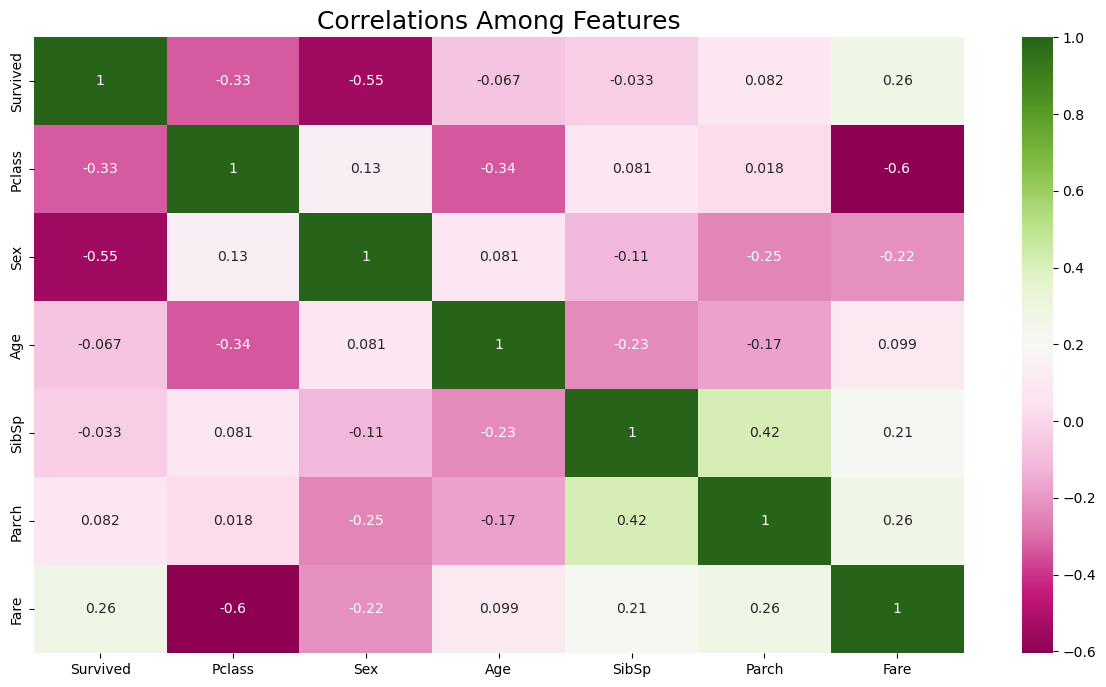

In [32]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

Fare and Survived: 0.26.
There is a positive correlation between Fare and Survived rated. This can be explained by saying that,
the passenger who paid more money for their ticket were more likely to survive.

Negative Correlation Features:

Fare and Pclass: -0.55
This relationship can be explained by saying that first class passenger(1) paid more for fare then second 
class passenger(2), similarly second class passenger paid more than the third class passenger(3).
Gender and Survived: -0.54
Basically is the info of whether the passenger was male or female.
Pclass and Survived: -0.34

Gender and Survived

([<matplotlib.axis.XTick at 0x24bc79186d0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

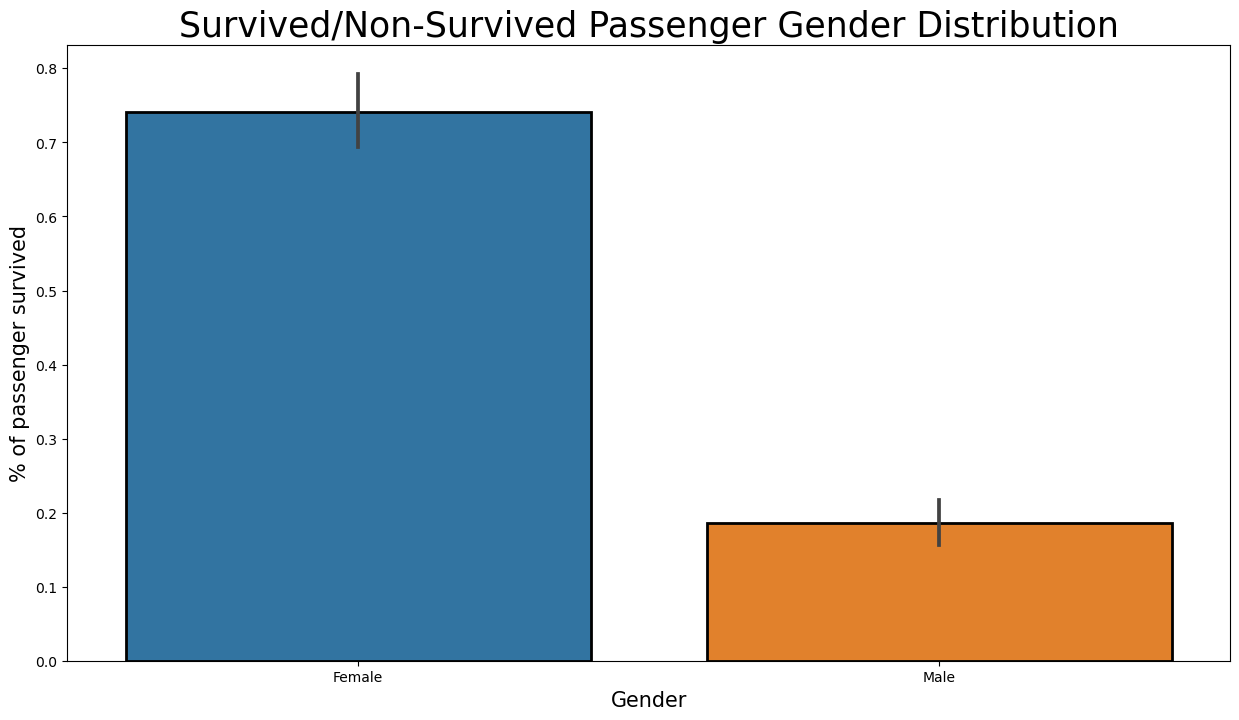

In [33]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(df.Sex.unique()), labels)

This bar plot above shows the distribution of female and male survived. The x_label shows gender 
and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% 
male passenger survived.

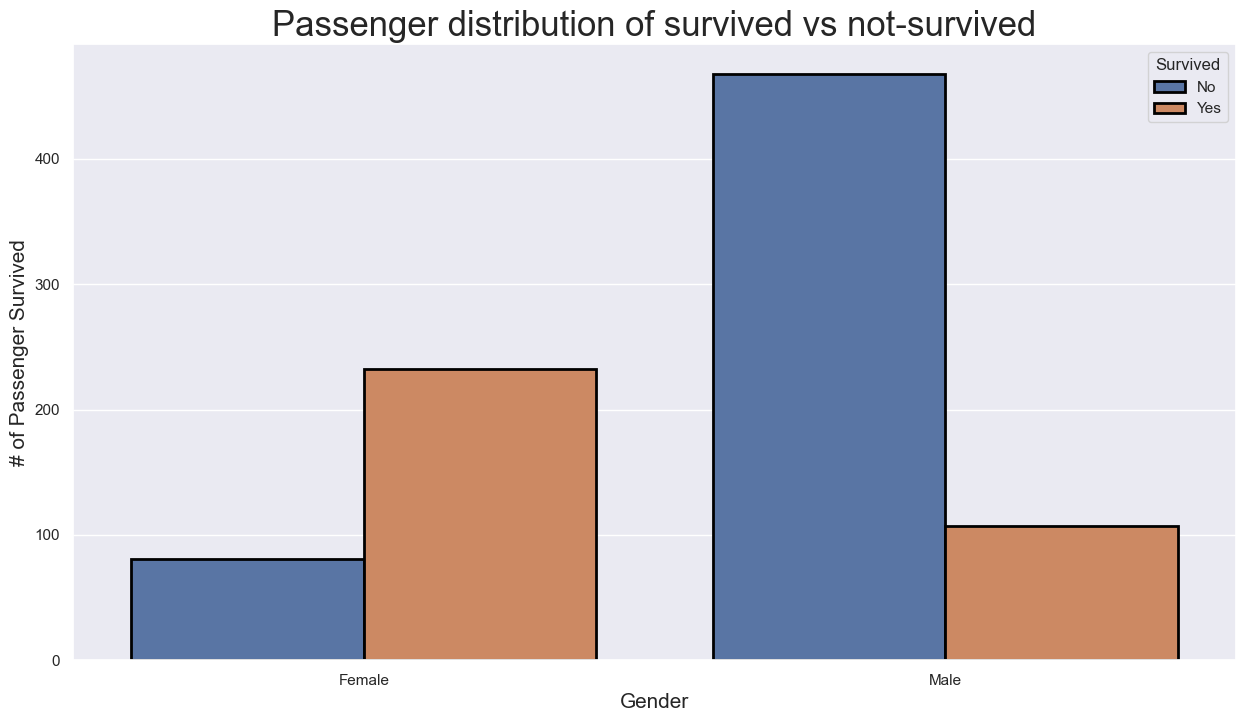

In [34]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex',data=df,hue='Survived',edgecolor=(0,0,0),linewidth=2)
df.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(df.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

This count plot shows the actual distribution of male and female passengers that survived and did not survive. 
It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived
and ~480 did not survive.

Summary

As we suspected, female passengers have survived at a much better rate than male passengers.
It seems about right since females and children were the priority.

Pclass and Survived

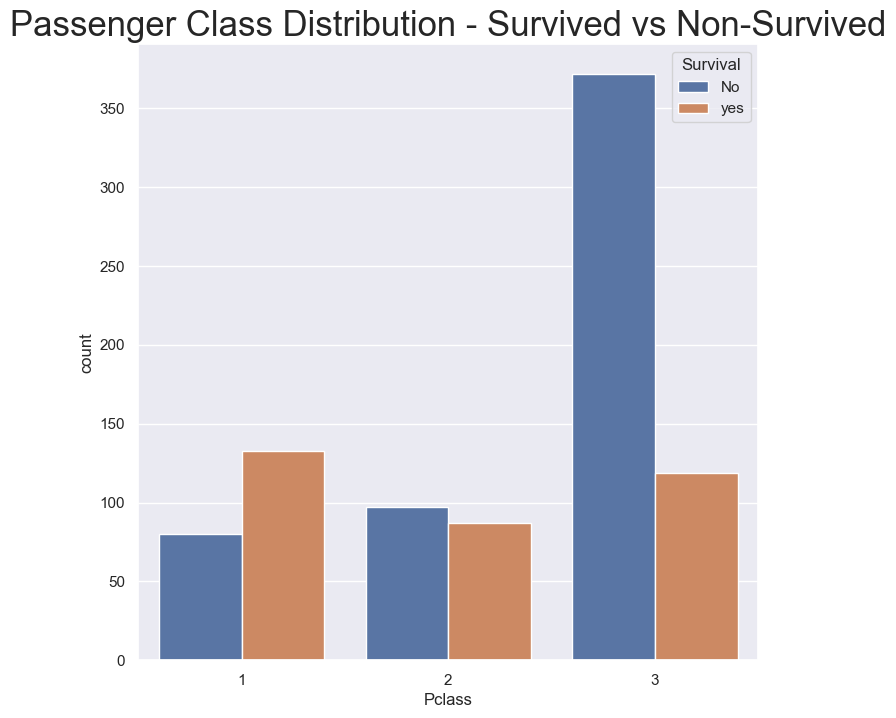

In [35]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

So it clearly seems that,The survival of the people belong to 3rd class is very least. It looks like ...

63% first class passenger survived titanic tragedy, while
48% second class and
only 24% third class passenger survived.

([<matplotlib.axis.XTick at 0x24bc74ca530>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

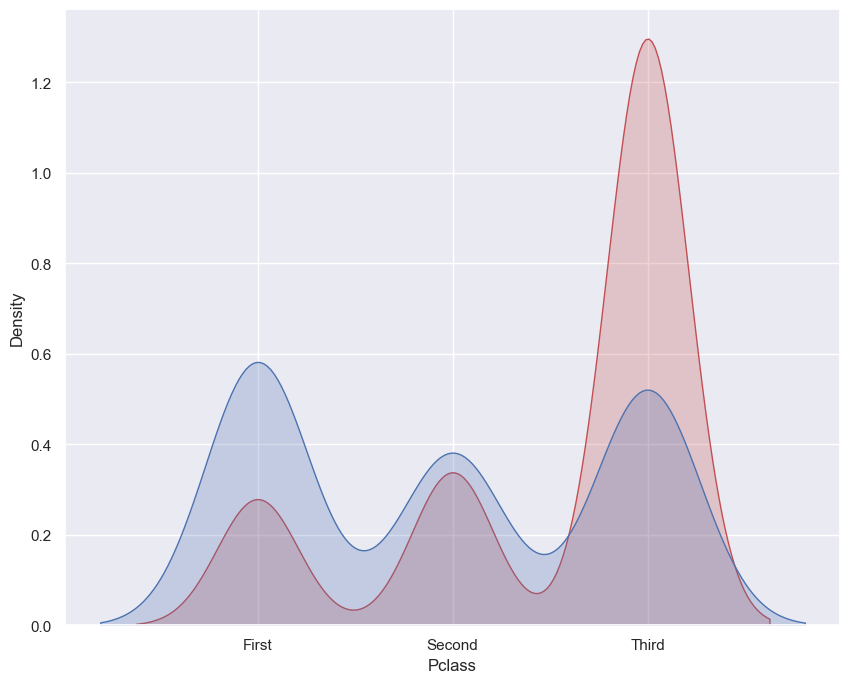

In [36]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)


This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some 
readers might find questionable is that in, the plot; the third class passengers have survived more than second 
class passnegers. It is true since there were a lot more third class passengers than first and second.

Summary

First class passenger had the upper hand during the tragedy than second and third class passengers. 
i can probably agree with me more on this, when we look at the distribution of ticket fare and survived column.

 Fare and Survived

Text(0.5, 0, 'Fare')

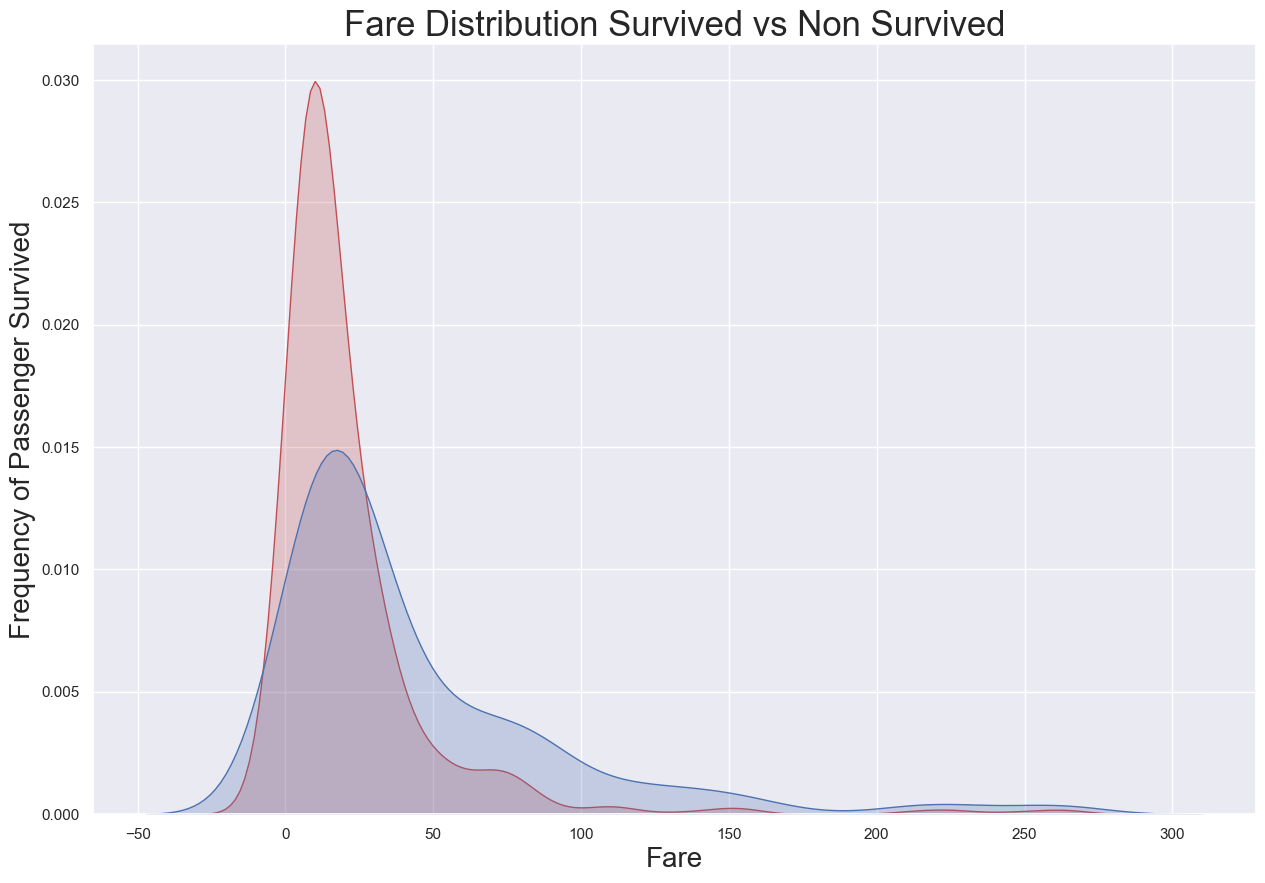

In [37]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

In [38]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


Age and Survived

<Axes: xlabel='Age', ylabel='Density'>

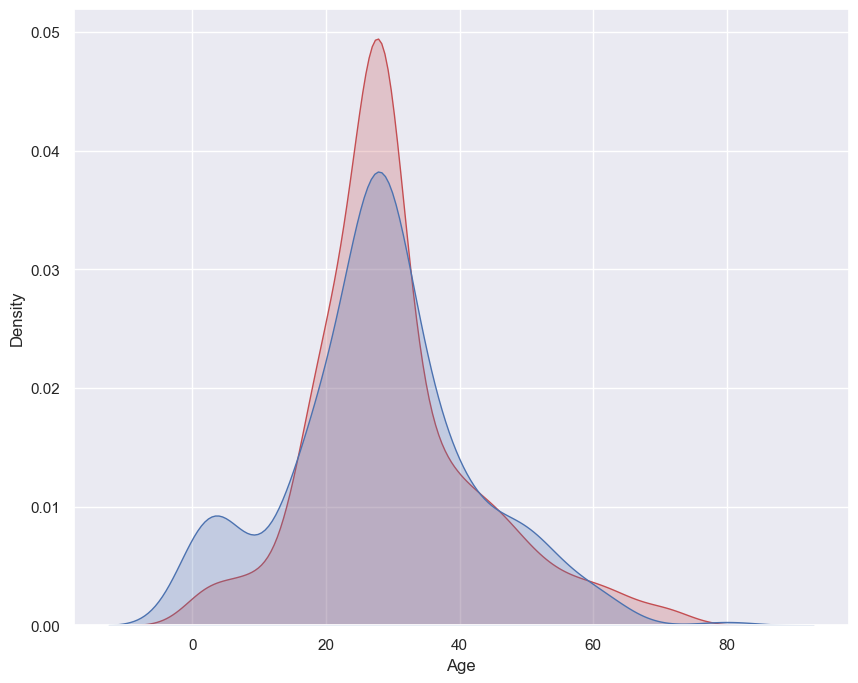

In [39]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(df.loc[(df['Survived']==0),'Age'],color='r',shade=True,label='Not Survived')
sns.kdeplot(df.loc[(df['Survived']==1),'Age'],color='b',shade=True,label='Survived')

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that

children and infants were the priority.

In [40]:
# Data Cleaning

# Dropping Name,Cabin  and Ticket since we do not require
df =df.drop(['Name', 'Cabin', 'Ticket'], axis=1)      

df.shape

(888, 9)

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Rev
887,1,1,0,19.0,0,0,30.0000,S,Miss
888,0,3,0,28.0,1,2,23.4500,S,Miss
889,1,1,1,26.0,0,0,30.0000,C,Mr


In [42]:
# Assigning binary values for sex to convert it into integer formatle=LabelEncoder()
df['Embarked']=label.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 888, dtype: int32

In [43]:
df['Title']=label.fit_transform(df['Title'])
df['Title']

0      11
1      12
2       8
3      12
4      11
       ..
886    14
887     8
888     8
889    11
890    11
Name: Title, Length: 888, dtype: int32

In [44]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [47]:
df =df.drop(['Fare'], axis=1)      

df.shape

(888, 8)

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,1,22.0,1,0,2,11
1,1,1,0,38.0,1,0,0,12
2,1,3,0,26.0,0,0,2,8
3,1,1,0,35.0,1,0,2,12
4,0,3,1,35.0,0,0,2,11
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2,14
887,1,1,0,19.0,0,0,2,8
888,0,3,0,28.0,1,2,2,8
889,1,1,1,26.0,0,0,0,11


In [52]:
correlations = df.corr()['Survived'].sort_values(ascending=False)
print(correlations)

Survived    1.000000
Parch       0.082157
SibSp      -0.033395
Age        -0.067081
Embarked   -0.156639
Title      -0.193797
Pclass     -0.334068
Sex        -0.545899
Name: Survived, dtype: float64


no data is skewed

<Axes: >

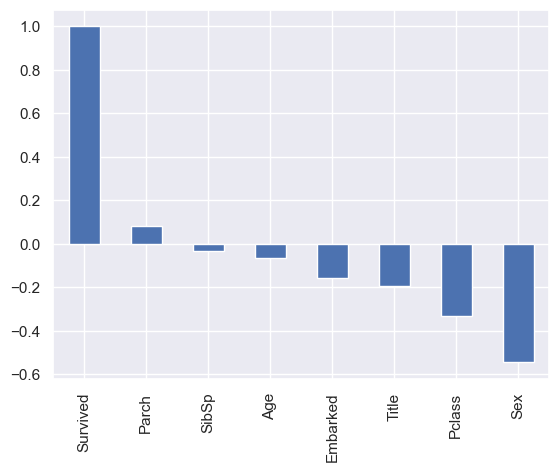

In [53]:
correlations.plot(kind='bar')

we observe that sex and pclass i more corellated

# Separating feature and target

In [55]:
x=df.drop("Survived", axis= 1)
y=df["Survived"]

# Feature Scaling using Standard Scalarization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0.824123,0.737799,-0.563437,0.430627,-0.473353,0.577273,0.413926
1,-1.575290,-1.355382,0.664528,0.430627,-0.473353,-1.954175,0.960088
2,0.824123,-1.355382,-0.256446,-0.475527,-0.473353,0.577273,-1.224558
3,-1.575290,-1.355382,0.434285,0.430627,-0.473353,0.577273,0.960088
4,0.824123,0.737799,0.434285,-0.475527,-0.473353,0.577273,0.413926
...,...,...,...,...,...,...,...
883,-0.375584,0.737799,-0.179698,-0.475527,-0.473353,0.577273,2.052411
884,-1.575290,-1.355382,-0.793681,-0.475527,-0.473353,0.577273,-1.224558
885,0.824123,-1.355382,-0.102950,0.430627,2.006516,0.577273,-1.224558
886,-1.575290,0.737799,-0.256446,-0.475527,-0.473353,-1.954175,0.413926


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [57]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.198747,Pclass
1,1.153431,Sex
2,1.301500,Age
3,1.273682,SibSp
4,1.280105,Parch
5,1.041114,Embarked
6,1.187644,Title


In [ ]:
we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [58]:
y.value_counts()

0    549
1    339
Name: Survived, dtype: int64

oversampling

In [59]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [60]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [64]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

Best accuracy is = 0.8242424242424242 at random_state  200


we observe the best accuracy is 82.4% at random_state 200

# creat train test split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [66]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [67]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.8181818181818182
[[125  35]
 [ 25 145]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       160
           1       0.81      0.85      0.83       170

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



we observe that RandomForestClassifier accuracy 82%

# LogisticRegression

In [68]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.8151515151515152
[[123  37]
 [ 24 146]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       160
           1       0.80      0.86      0.83       170

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.81       330
weighted avg       0.82      0.82      0.81       330



we observe that LogisticRegression acuracy 81%

# support vector classifier

In [69]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.8212121212121212
[[138  22]
 [ 37 133]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       160
           1       0.86      0.78      0.82       170

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



we observe that support vector classifier accuracy is 82%

# GradientBoostingClassifier

In [70]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8303030303030303
[[134  26]
 [ 30 140]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       160
           1       0.84      0.82      0.83       170

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



we observe that GradientBoostingClassifier accuracy 83%

# ExtraTreeClassifier

In [71]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.8090909090909091
[[124  36]
 [ 27 143]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.80      0.84      0.82       170

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



we observe that ExtraTreeClassifier accuracy 80%

# Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

SyntaxError: unterminated string literal (detected at line 1) (2607597168.py, line 1)

In [74]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.76966292 0.79775281 0.81460674 0.77966102 0.82485876]
0.7973084491842825
Difference between Accuracy score and cross validation score is - 0.02087336899753578


In [75]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.75842697 0.79213483 0.82022472 0.79661017 0.81920904]
0.7973211451786961
Difference between Accuracy score and cross validation score is - 0.01783036997281906


In [76]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.83707865 0.82022472 0.82022472 0.79661017 0.85875706]
0.8265790643052118
Difference between Accuracy score and cross validation score is - -0.005366943093090604


In [77]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.82022472 0.8258427  0.83146067 0.79661017 0.83615819]
0.8220592902939124
Difference between Accuracy score and cross validation score is - 0.008243740009117873


In [79]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.73033708 0.79213483 0.78089888 0.79661017 0.79096045]
0.7781882815971561
Difference between Accuracy score and cross validation score is - 0.030902627493752943


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.005366943093090604 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [80]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [81]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'cache_size': [200, 400],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, -2]})

In [83]:
GCV.best_params_

{'C': 1, 'cache_size': 200, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}

In [84]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

80.9090909090909


# Plotting ROC compare auc for all the models used

In [85]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

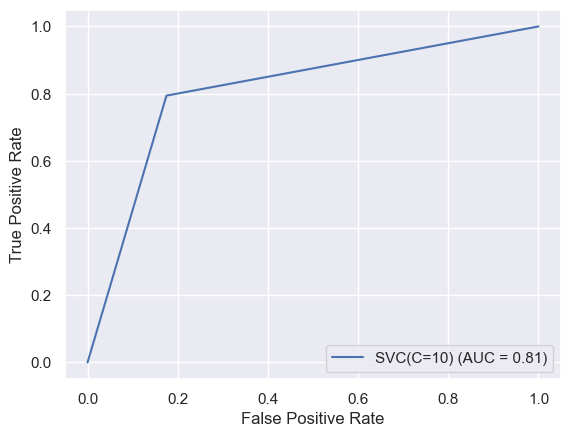

In [86]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [87]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Titanic_survived_Prediction_Project_Analysis.pkl")

['Titanic_survived_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [88]:
# first we load the saved model and get prediction
model = joblib.load("Titanic_survived_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

# these are the prediction for survived 

In [89]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
325,1,1
326,1,1
327,1,0
328,0,0
